In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




In [3]:
path = 'dataset.csv'

try:
    df = pd.read_csv(path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(path, encoding='latin1')

df.head


<bound method NDFrame.head of     Rank                Player        Nation Confederation  Goals  Caps  \
0      1     Cristiano Ronaldo      Portugal          UEFA    135   217   
1      2          Lionel Messi     Argentina      CONMEBOL    112   190   
2      3              Ali Daei          Iran           AFC    108   148   
3      4         Sunil Chhetri         India           AFC     94   151   
4      5        Mokhtar Dahari      Malaysia           AFC     89   142   
..   ...                   ...           ...           ...    ...   ...   
77    76        Hwang Sun-hong   South Korea           AFC     50   103   
78    76            Tim Cahill     Australia     AFC / OFC     50   108   
79    76        Shinji Okazaki         Japan           AFC     50   119   
80    76  Zainal Abidin Hassan      Malaysia           AFC     50   129   
81    76         Son Heung-min   South Korea           AFC     50   130   

    Goals per match Career span Date of 50th goal  
0              0.

In [ ]:
df.columns

Index(['Rank', 'Player', 'Nation', 'Confederation', 'Goals', 'Caps',
       'Goals per match', 'Career span', 'Date of 50th goal'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               82 non-null     int64  
 1   Player             82 non-null     object 
 2   Nation             82 non-null     object 
 3   Confederation      82 non-null     object 
 4   Goals              82 non-null     int64  
 5   Caps               82 non-null     int64  
 6   Goals per match    82 non-null     float64
 7   Career span        82 non-null     object 
 8   Date of 50th goal  82 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.9+ KB


In [6]:
df['Date of 50th goal'] = pd.to_datetime(df['Date of 50th goal'])
print(df['Date of 50th goal'])

data_corte = "2024"
df['Career span'] = df['Career span'].apply(lambda x: f"{x.split('-')[0]} - {data_corte}" if pd.notna(x) and x.endswith('-') else x)
print(df['Career span'])

0    2014-06-26
1    2016-03-29
2    2000-01-09
3    2015-12-31
4    1976-08-22
        ...    
77   2002-06-04
78   2017-10-10
79   2017-03-28
80   1997-03-31
81   2024-11-14
Name: Date of 50th goal, Length: 82, dtype: datetime64[ns]
0     2003 - 2024
1     2005 - 2024
2       1993-2006
3       2005-2024
4       1972-1985
         ...     
77      1988-2002
78      2004-2018
79      2008-2019
80      1980-1997
81    2010 - 2024
Name: Career span, Length: 82, dtype: object


C:\Users\Gabriel Nardino\AppData\Local\Temp\ipykernel_16424\3363047234.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of 50th goal'] = pd.to_datetime(df['Date of 50th goal'])


In [7]:
df.columns

Index(['Rank', 'Player', 'Nation', 'Confederation', 'Goals', 'Caps',
       'Goals per match', 'Career span', 'Date of 50th goal'],
      dtype='object')

In [ ]:
"""
Perguntas a serem respondidas:

1. Top Artilheiros e Eficiência: Identificar os maiores artilheiros e analisar sua média de gols por partida. #Check
2. Confederação com Mais Artilheiros: Descobrir qual confederação tem mais jogadores com 50+ gols.#Check
2. Tempo para 50 Gols: Identificar quais jogadores alcançaram 50 gols mais rapidamente.#Check
3. Correlação Gols vs Partidas: Avaliar a relação entre número de partidas e gols totais.#Check
4. Eficiência e Longevidade: Analisar se jogadores com carreiras longas mantêm alta eficiência de gols.#Check
5. Períodos de Carreira dos 10 Maiores Artilheiros: #Check
6. Média de Gols por Confederação: Comparar a eficiência de gols entre confederações.
7. Carreiras Mais Longas: Verificar quais jogadores tiveram as carreiras internacionais mais longas e seu impacto nos gols.
8. Top Performers e Similaridades: Características comuns dos melhores jogadores em gols, média e partidas.
9. Data de 50 Gols e Tendências: Analisar quando os jogadores alcançaram 50 gols e identificar tendências ao longo do tempo.
10. Países com Mais Sucesso: Verificar quais países têm mais jogadores com 50+ gols e os fatores relacionados ao sucesso.

"""
# Verificar se as colunas de interesse estão disponíveis


# Top Artilheiros e Eficiência
top_scorers_rank = df.sort_values(by='Rank').head(10)  # Pegando os 10 melhores artilheiros pelo Rank
top_scorers_efficiency = df.sort_values(by="Goals per match", ascending=False).head(10)  # Ordenar por maior eficiência

# Exibir os melhores artilheiros e sua eficiência
print("Top 10 Maiores Artilheiros pelo Rank:")
print(top_scorers_rank[["Rank", "Player"]])

print("\nTop 10 Maiores Artilheiros por Eficiência (Goals per match):")
print(top_scorers_efficiency[["Rank", "Player", "Goals per match"]])



Top 10 Maiores Artilheiros pelo Rank:
   Rank              Player
0     1   Cristiano Ronaldo
1     2        Lionel Messi
2     3            Ali Daei
3     4       Sunil Chhetri
4     5      Mokhtar Dahari
5     6        Ali Mabkhout
6     6       Romelu Lukaku
7     8       Ferenc Puskás
8     8  Robert Lewandowski
9    10     Godfrey Chitalu

Top 10 Maiores Artilheiros por Eficiência (Goals per match):
    Rank              Player  Goals per match
13    14     Vivian Woodward             1.42
62    63        Poul Nielsen             1.37
26    27         Gerd Müller             1.10
14    14       Sándor Kocsis             1.10
15    14  Kunishige Kamamoto             0.99
7      8       Ferenc Puskás             0.94
38    39      Imre Schlosser             0.87
37    38  Abdul Ghani Minhat             0.86
12    13                Pelé             0.84
54    55             Romário             0.79


In [9]:
# 2. Confederação com Mais Artilheiros: Descobrir qual confederação tem mais jogadores com 50+ gols e 
# tambem quais jogadores atingiram antes a marca de gols na carreira.

# Acredito que ficou faltando essa observacao, minha coluna Career span tem as informacoes de inicio e fim da carreira do jogador(por exemplo 
# "1950 - 1980" ou "2004-2024", entao a informacao esta nessa coluna, preciso fazer o calculo de quando a carreia desse jogador comecou,
# ou seja antes do (-)  e verificar com a data do 50th goals, para ficar menos complicado a comparacao, vamos arendodar em outra coluna o ano, 
# da marca desse gol, pois na career span, tem apenas os anos da carreira dos jogadores, sem data especifica


# Extrair o ano de início da carreira
df['Career Start'] = df['Career span'].str.extract(r'(\d{4})').astype(int)

# Arredondar o ano da marca do 50º gol
df['Year of 50th Goal'] = pd.to_datetime(df['Date of 50th goal'], errors='coerce').dt.year

# Calcular o tempo em anos para atingir o 50º gol
df['Years to 50th Goal'] = df['Year of 50th Goal'] - df['Career Start']

# Filtrar jogadores com 50+ gols
conf_players_50_goals = df[df['Goals'] >= 50]

# Contar o número de jogadores em cada confederação
conf_counts = conf_players_50_goals['Confederation'].value_counts()

# Identificar os jogadores que atingiram o marco de 50 gols mais rapidamente
quickest_players_50 = conf_players_50_goals.sort_values(by='Years to 50th Goal').dropna(subset=['Years to 50th Goal']).head(10)

# Exibir os resultados
print("Confederação com mais jogadores com 50+ gols:")
print(conf_counts)

print("\nJogadores que atingiram 50 gols no menor período de carreira:")
print(quickest_players_50[['Rank', 'Player', 'Confederation', 'Years to 50th Goal', 'Career Start', 'Year of 50th Goal']])




Confederação com mais jogadores com 50+ gols:
Confederation
AFC          34
UEFA         25
CONMEBOL      9
CAF           7
CONCACAF      6
AFC / OFC     1
Name: count, dtype: int64

Jogadores que atingiram 50 gols no menor período de carreira:
    Rank           Player Confederation  Years to 50th Goal  Career Start  \
4      5   Mokhtar Dahari           AFC                   4          1972   
18    19     Kinnah Phiri           CAF                   5          1973   
44    44      Cha Bum-kun           AFC                   5          1972   
16    14  Bashar Abdullah           AFC                   6          1996   
40    39      David Villa          UEFA                   6          2005   
10    10           Neymar      CONMEBOL                   6          2010   
27    27       Harry Kane          UEFA                   7          2015   
17    18   Majed Abdullah           AFC                   7          1977   
11    12    Hussein Saeed           AFC                   7   

Correlação entre Gols e Partidas: 0.41
Correlação entre Gols e Eficiência: 0.29
                    Goals      Caps  Goals per match
Goals            1.000000  0.411542         0.293597
Caps             0.411542  1.000000        -0.667512
Goals per match  0.293597 -0.667512         1.000000


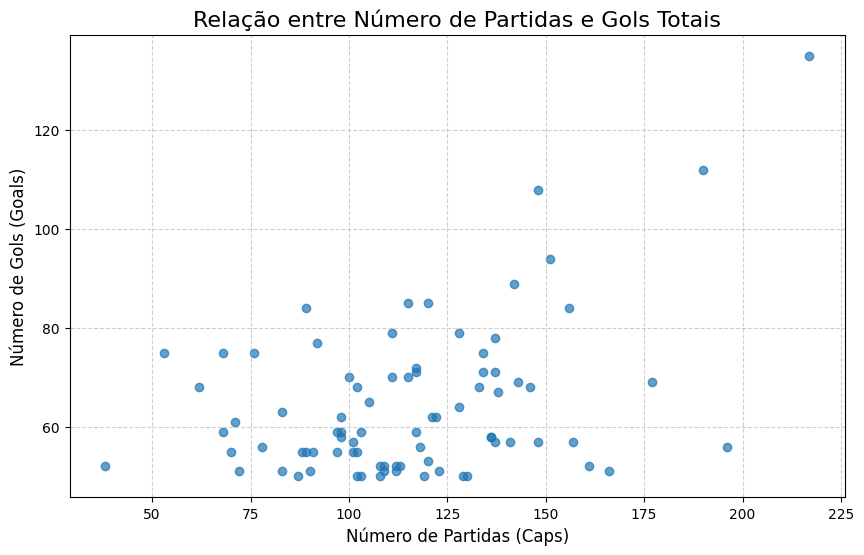

'\nCorrelacao entre gols / partidas = moderada\nCorrelacao entre gols / eficiencia = fraca\nCorrelacao entre partidas / eficiencia = NEGATIVA FORTE\n\nOs insights tirados sao: Gols/ partidas nos informa \n\n\n'

In [ ]:
# 3. Correlação Gols vs Partidas: Avaliar a relação entre número de partidas e gols totais.

import matplotlib.pyplot as plt

# Calcular a correlação entre Gols e Partidas (Caps)
correlation_caps = df['Goals'].corr(df['Caps'])

# Calcular a correlação entre Gols e Eficiência (Goals per match)
correlation_efficiency = df['Goals'].corr(df['Goals per match'])
correlations = df[['Goals', 'Caps', 'Goals per match']].corr()


# Exibir os resultados
print(f"Correlação entre Gols e Partidas: {correlation_caps:.2f}")
print(f"Correlação entre Gols e Eficiência: {correlation_efficiency:.2f}")
print(correlations)


# Plotar o gráfico de dispersão para visualizar a relação
plt.figure(figsize=(10, 6))
plt.scatter(df['Caps'], df['Goals'], alpha=0.7)
plt.title("Relação entre Número de Partidas e Gols Totais", fontsize=16)
plt.xlabel("Número de Partidas (Caps)", fontsize=12)
plt.ylabel("Número de Gols (Goals)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


'''
Correlacao entre gols / partidas = moderada
Correlacao entre gols / eficiencia = fraca
Correlacao entre partidas / eficiencia = NEGATIVA FORTE
'''

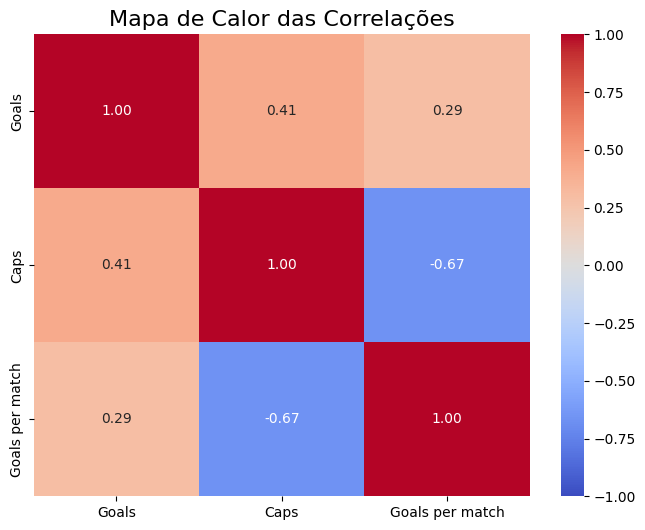

In [ ]:
# outra visualziacao da nossa correlacao

correlation_matrix = df[['Goals', 'Caps', 'Goals per match']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Mapa de Calor das Correlações", fontsize=16)
plt.show()


In [ ]:
'''Insights retirados
Existe uma correlação positiva entre "Goals" e "Caps" (0.41), indicando que jogadores com mais jogos tendem a marcar mais gols,
o que faz sentido, já que mais partidas oferecem mais oportunidades.

A correlação negativa entre "Goals per Match" e "Caps" (-0.67) chamou atenção. Isso sugere que jogadores mais experientes,
com muitos jogos, geralmente têm uma média de gols por jogo menor. Isso pode ser explicado por mudanças táticas,
como posições mais defensivas ao longo da carreira.

Já a correlação positiva entre "Goals" e "Goals per Match" (0.29) é fraca, mas indica que jogadores que marcam mais gols também mantêm, 
em média, uma boa taxa de gols por jogo, embora outliers possam influenciar.

Esses dados reforçam que longevidade nem sempre garante alta eficiência, já que a função tática e o desgaste físico 
impactam o desempenho ao longo do tempo.

'''

    Rank              Player  Career Start  Career End  Career Duration  \
36    35  Zlatan Ibrahimovic          2001        2023               22   
0      1   Cristiano Ronaldo          2003        2024               21   
25    25       Hossam Hassan          1985        2006               21   
38    39      Imre Schlosser          1906        1927               21   
43    44          Ali Ashfaq          2003        2023               20   
53    52     Bader Al-Mutawa          2003        2022               19   
3      4       Sunil Chhetri          2005        2024               19   
1      2        Lionel Messi          2005        2024               19   
28    27         Carlos Ruiz          1998        2016               18   
54    55             Romário          1987        2005               18   

    Goals per match  
36             0.51  
0              0.62  
25             0.39  
38             0.87  
43             0.59  
53             0.29  
3              0.62 

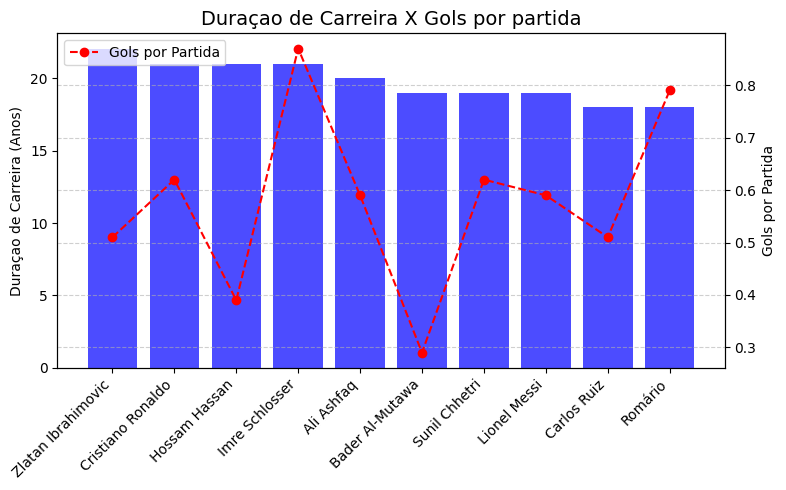

In [108]:
# 4. Eficiência e Longevidade: Analisar se jogadores com carreiras longas mantêm alta eficiência de gols.

df['Career Start'] = df['Career span'].str.extract(r'(\d{4})').astype(int)  # Primeiro ano
df['Career End'] = df['Career span'].str.extract(r'(\d{4})$').fillna(2024).astype(int)  # Último ano, assume 2024 para jogadores ativos

df['Career Duration'] = df['Career End'] - df['Career Start']

long_career_players = df.sort_values(by="Career Duration", ascending=False).head(10)

print(long_career_players[['Rank','Player', 'Career Start', 'Career End', 'Career Duration', 'Goals per match']])

# Ordenar os jogadores por duração da carreira
long_career_players = long_career_players.sort_values(by="Career Duration", ascending=False)
print(long_career_players)

plt.figure(figsize=(8, 5))
plt.bar(long_career_players['Player'], long_career_players['Career Duration'], label='Career Duration (Years)', alpha=0.7, color='blue')
plt.ylabel('Duraçao de Carreira (Anos)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.twinx()
plt.plot(long_career_players['Player'], long_career_players['Goals per match'], marker='o', linestyle='--', label='Gols por Partida', color='red')
plt.ylabel('Gols por Partida', fontsize=10)
plt.title('Duraçao de Carreira X Gols por partida', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Correlação entre Duração da Carreira e Gols por Partida: -0.24


C:\Users\Gabriel Nardino\AppData\Local\Temp\ipykernel_16424\2696389569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Confederation", y="Goals per match", data=df, palette="Set2", dodge=False)


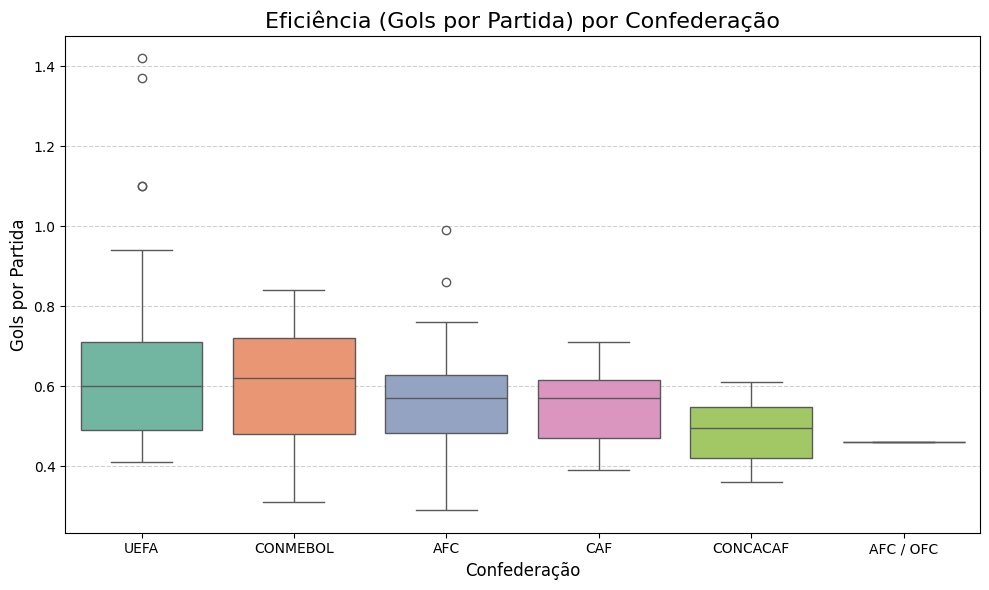

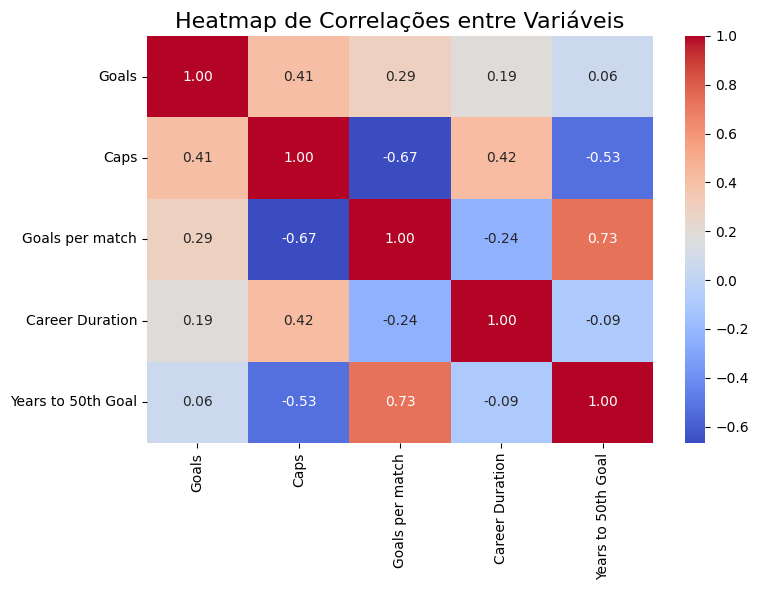


Média de Gols por Partida por Confederação:
Confederation
AFC          0.564706
AFC / OFC    0.460000
CAF          0.548571
CONCACAF     0.486667
CONMEBOL     0.601111
UEFA         0.682800
Name: Goals per match, dtype: float64

Mediana de Gols por Partida por Confederação:
Confederation
AFC          0.570
AFC / OFC    0.460
CAF          0.570
CONCACAF     0.495
CONMEBOL     0.620
UEFA         0.600
Name: Goals per match, dtype: float64


In [ ]:
#Aplicando estatistica para analisar os dados

correlation_duration_efficiency = df["Career Duration"].corr(df["Goals per match"])
print(f"Correlação entre Duração da Carreira e Gols por Partida: {correlation_duration_efficiency:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Confederation", y="Goals per match", data=df, palette="Set2", dodge=False)
plt.title("Eficiência (Gols por Partida) por Confederação", fontsize=16)
plt.xlabel("Confederação", fontsize=12)
plt.ylabel("Gols por Partida", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[["Goals", "Caps", "Goals per match", "Career Duration", "Years to 50th Goal"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlações entre Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

mean_efficiency = df.groupby("Confederation")["Goals per match"].mean()
median_efficiency = df.groupby("Confederation")["Goals per match"].median()

print("\nMédia de Gols por Partida por Confederação:")
print(mean_efficiency)
print("\nMediana de Gols por Partida por Confederação:")
print(median_efficiency)



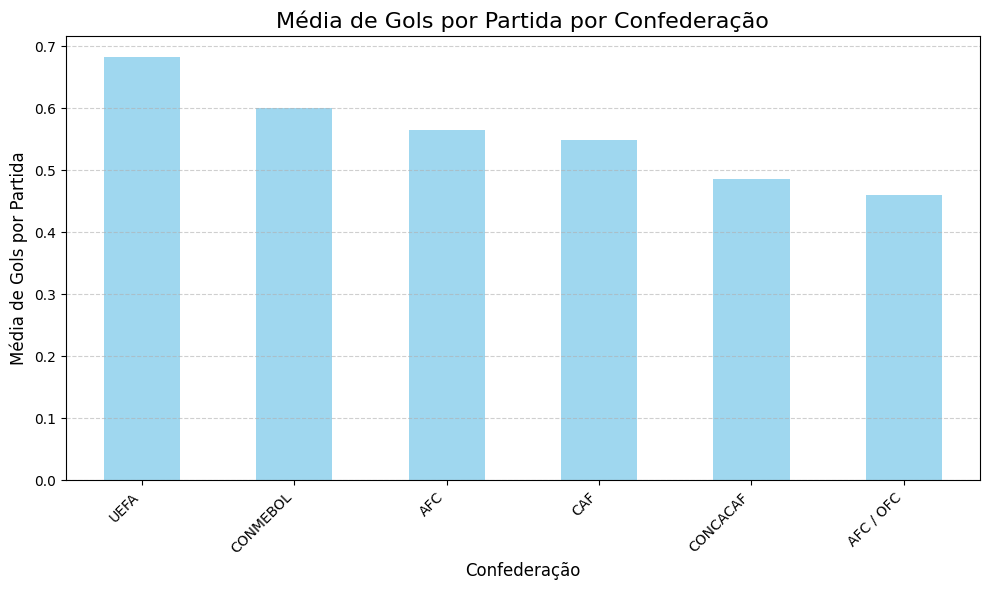

In [59]:
# 6. Média de Gols por Confederação: Comparar a eficiência de gols entre confederações.

plt.figure(figsize=(10, 6))
mean_efficiency.plot(kind="bar", color="skyblue", alpha=0.8)
plt.title("Média de Gols por Partida por Confederação", fontsize=16)
plt.xlabel("Confederação", fontsize=12)
plt.ylabel("Média de Gols por Partida", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
"""
Insights:
Correlação positiva de 0.73, sugerindo que jogadores mais eficientes atingem 50 gols mais rapidamente.

UEFA tem a maior média (0.6828), destacando a eficiência de seus jogadores.
CONMEBOL vem em segundo lugar (0.6011), reforçando a força dos jogadores sul-americanos.
AFC / OFC apresenta a menor média (0.4600), indicando que jogadores dessas regiões geralmente têm menor eficiência.

A mediana para a UEFA (0.600) e CONMEBOL (0.620) sugere que a eficiência desses jogadores não é apenas 
influenciada por poucos outliers, mas é consistente dentro das confederações.

Falando sobre AFC e CAF:
Tanto a média quanto a mediana são próximas de 0.56 e 0.57, 
indicando uma eficiência similar entre as confederações asiática e africana.

"""

Períodos de Carreira dos 10 Maiores Artilheiros:
               Player  Career span
0   Cristiano Ronaldo  2003 - 2024
1        Lionel Messi  2005 - 2024
2            Ali Daei    1993-2006
3       Sunil Chhetri    2005-2024
4      Mokhtar Dahari    1972-1985
5        Ali Mabkhout  2009 - 2024
6       Romelu Lukaku  2010 - 2024
7       Ferenc Puskás    1945-1962
8  Robert Lewandowski  2008 - 2024
9     Godfrey Chitalu    1968-1980


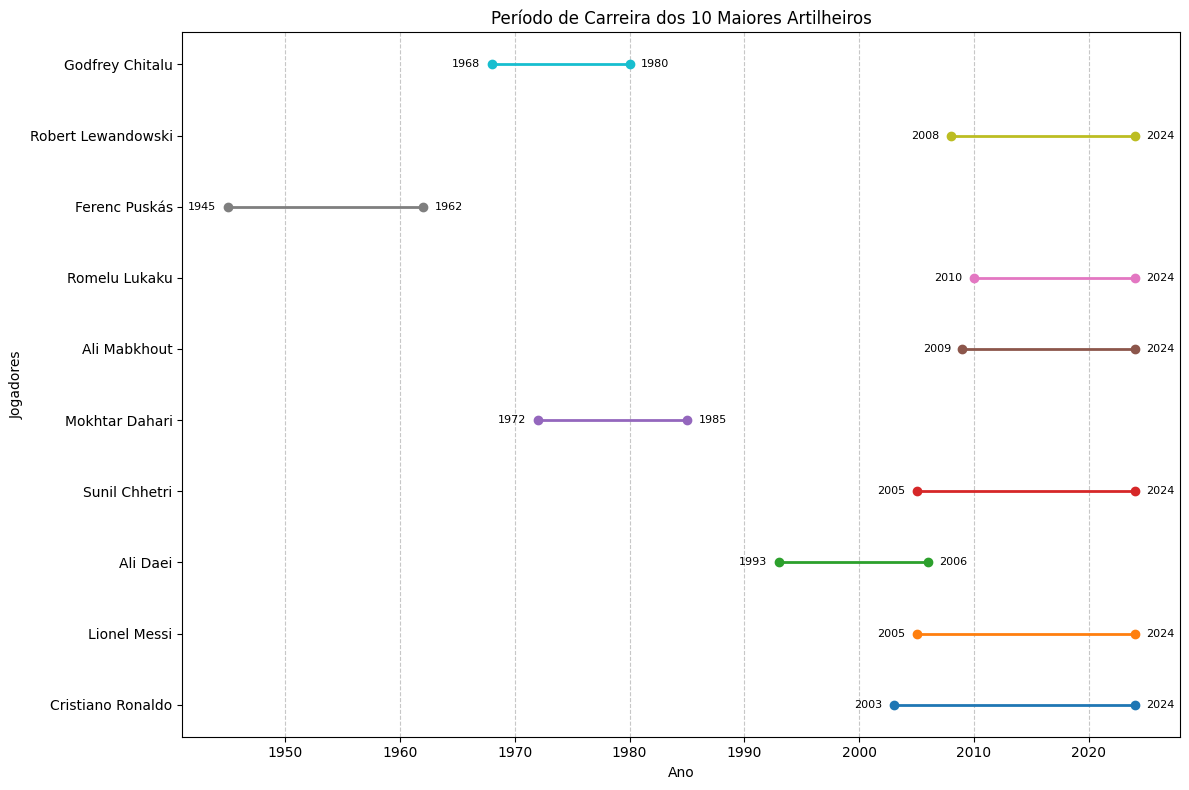

In [ ]:
# Vamos analisar quais sao os periodos de carreira de cada jogador de nosso top 10, pois conseguimos visualizar que jogadores de 
# decadas passadas estao com maiores percentuais de gols/partidas.

# Análise dos Períodos de Carreira dos Jogadores
# Visualizar os períodos de carreira dos jogadores do Top 10
career_periods = top_scorers_efficiency[['Player', 'Career span']]
print("Períodos de Carreira dos 10 Maiores Artilheiros:")
print(career_periods)

# Gráfico de Linha - Período de Carreira de Cada Jogador
plt.figure(figsize=(12, 8))
for index, row in career_periods.iterrows():
    career_start, career_end = row['Career span'].split('-')
    career_start = int(career_start.strip())
    career_end = int(career_end.strip()) if career_end.strip().isdigit() else 2024
    plt.plot([career_start, career_end], [index, index], marker='o', linestyle='-', linewidth=2, label=row['Player'], color=plt.cm.tab10(index % 10))
    plt.text(career_start - 1, index, f'{career_start}', va='center', ha='right', fontsize=8, color='black')
    plt.text(career_end + 1, index, f'{career_end}', va='center', ha='left', fontsize=8, color='black')

plt.xlabel('Ano')
plt.ylabel('Jogadores')
plt.title('Período de Carreira dos 10 Maiores Artilheiros')
plt.yticks(range(len(career_periods)), career_periods['Player'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


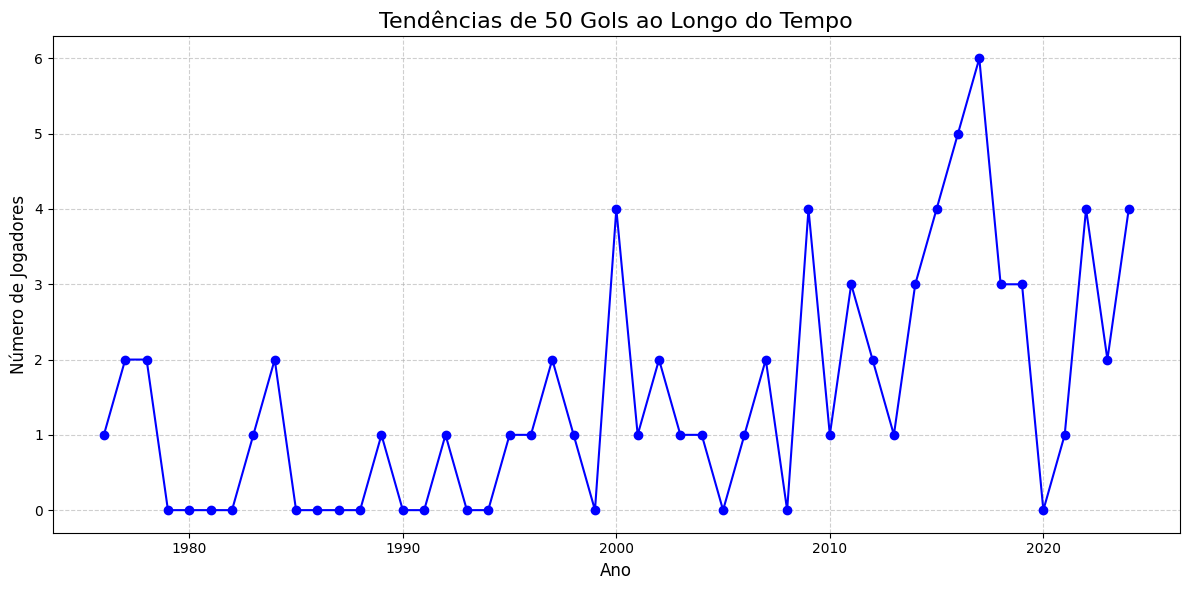

In [113]:
# 9. Data de 50 Gols e Tendências: Analisar quando os jogadores alcançaram 50 gols e identificar tendências ao longo do tempo.

# Passo 1: Certifique-se de que as datas estão corretas e limite até 2024
df['Date of 50th goal'] = pd.to_datetime(df['Date of 50th goal'], errors='coerce')
df['Year of 50th Goal'] = df['Date of 50th goal'].dt.year

# Filtrar apenas anos válidos (até 2024)
df = df[df['Year of 50th Goal'] <= 2024]

# Passo 2: Contagem dos jogadores que atingiram 50 gols por ano
fifty_goal_trends = df['Year of 50th Goal'].value_counts().sort_index()

# Passo 3: Reindexar para preencher anos ausentes (somente até 2024)
all_years = pd.Series(index=range(fifty_goal_trends.index.min(), 2024 + 1), dtype=int)
fifty_goal_trends = fifty_goal_trends.reindex(all_years.index, fill_value=0)

# Passo 4: Gráfico de tendência
plt.figure(figsize=(12, 6))
plt.plot(fifty_goal_trends.index, fifty_goal_trends.values, marker='o', linestyle='-', color='blue')
plt.title("Tendências de 50 Gols ao Longo do Tempo", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Jogadores", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
"""
Conseguimos verificar que antes dos anos 2000, tem uma certa baixa de numeros de jogadores
que conseguiram atingir a marcar de 50 gols na carreira, posteriormente aos anos 2000, essa margem sobe
Outro insights que podemos verificar e que a media como um todo subiu, mas existem mais jogadores outliders que inflam nossa grafico 
"""

Top Países com Mais Jogadores com 50+ Gols:
Nation
 Kuwait                       4
 Iran                         4
 Thailand                     3
 Brazil                       3
 Iraq                         3
 South Korea                  3
 Malaysia                     2
 United Arab Emirates         2
 Uruguay                      2
 Argentina                    2
 Egypt                        2
 Japan                        2
 United States                2
 France                       2
 England                      2
 Zambia                       1
 Portugal                     1
 India                        1
 Trinidad and Tobago          1
 Germany                      1
 Malawi                       1
 Saudi Arabia                 1
 England_ England amateurs    1
 Belgium                      1
 Poland                       1
 Bosnia and Herzegovina       1
 Sweden                       1
 Ivory Coast                  1
 Hungary                      1
 Serbia              

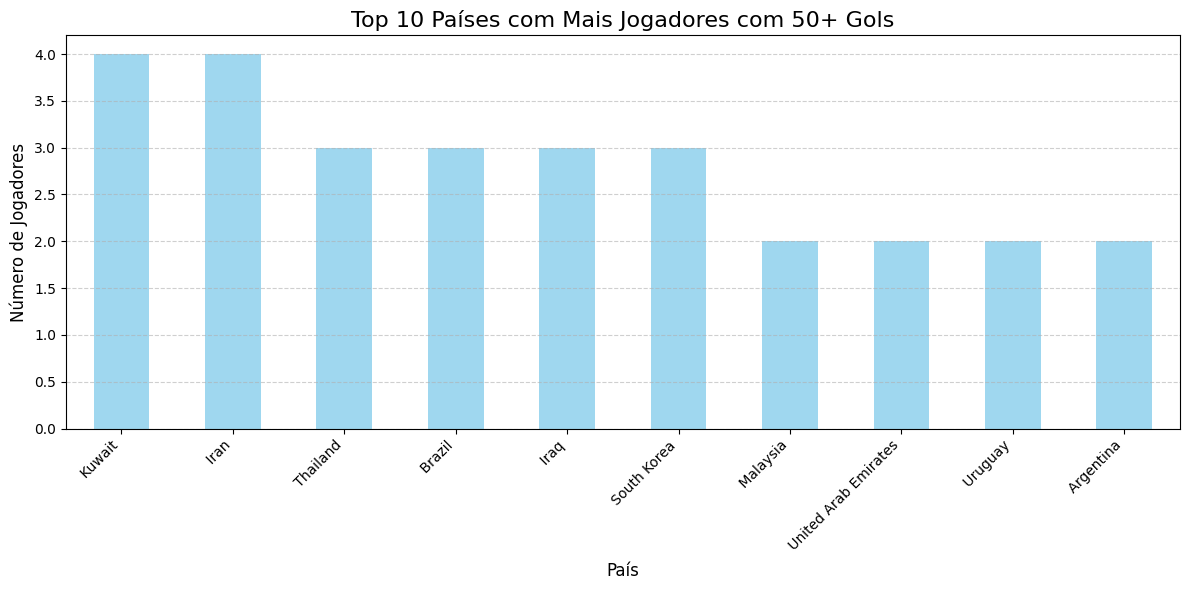

In [114]:
# Passo 1: Contar o número de jogadores com 50+ gols por país
top_countries = df[df['Goals'] >= 50]['Nation'].value_counts()

# Passo 2: Calcular a eficiência média (Goals per match) por país
efficiency_by_country = df.groupby('Nation')['Goals per match'].mean().sort_values(ascending=False)

# Passo 3: Contribuição por Confederação
countries_by_confederation = df.groupby('Confederation')['Nation'].nunique()

# Passo 4: Identificar os fatores de sucesso
success_factors = df.groupby('Nation').agg({
    'Goals': 'sum',  # Total de gols por país
    'Goals per match': 'mean',  # Média de eficiência por país
    'Career Duration': 'mean'  # Duração média da carreira
}).sort_values(by='Goals', ascending=False)

# Exibir os resultados
print("Top Países com Mais Jogadores com 50+ Gols:")
print(top_countries)

print("\nEficiência Média por País:")
print(efficiency_by_country)

print("\nContribuição por Confederação (Número de Países):")
print(countries_by_confederation)

print("\nFatores de Sucesso por País:")
print(success_factors)

# Gráfico de Barras para Top Países
plt.figure(figsize=(12, 6))
top_countries.head(10).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Top 10 Países com Mais Jogadores com 50+ Gols", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de Jogadores", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
